### 1. Import Libraries and Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os

In [2]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#create path
path = r'C:\Users\jacob\Documents\Data Analytics\Data Immersion\Achievement 4\10-2023 Instacart Basket Analysis'

In [4]:
#import orders products customers pickle
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

### 2. Check Data for PII

In [5]:
#check data personally identifiable info (names, address, etc.)
df.head()

,order_id,user_id,order_number,day_of_week,hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


The only PII contained in this data frame are customers first and last names. (names are fictitious for the use of this excercise, but they still need to be removed). 

In [6]:
#create a new data frame that removes columns of first and last names from df
df_2 = df.drop(columns = ['first_name','last_name'])

In [7]:
#check df_2 output
df_2.head()

,order_id,user_id,order_number,day_of_week,hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,NaN,NaN,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,13.0,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,10.0,Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.0,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423,both


### 3. Compare Spending and Geographic Regions

In [8]:
#create list of states for each region
Northeast = ['Maine', 'New Hampshire', 'Vermont', 
             'Massachusetts', 'Rhode Island', 
             'Connecticut', 'New York', 'Pennsylvania', 
             'New Jersey']

Midwest  = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana',
           'Ohio', 'North Dakota', 'South Dakota', 'Nebraska',
           'Kansas', 'Minnesota', 'Iowa', 'Missouri']

South = ['Delaware', 'Maryland', 'District of Columbia', 
        'Virginia', 'West Virginia', 'North Carolina', 
        'South Carolina', 'Georgia', 'Florida', 'Kentucky',
        'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma',
        'Texas', 'Arkansas', 'Louisiana']

West = ['Idaho', 'Montana', 'Wyoming', 'Nevada' , 'Utah', 
        'Colorado', 'Arizona', 'New Mexico', 'Alaska',
        'Washington', 'Oregon', 'California', 'Hawaii']       

In [9]:
# cretae a list for regions
region = {'Northeast' : Northeast, 'Midwest' : Midwest, 'South' : South, 'West' : West}

In [10]:
#create a definition for states in regions
def get_region (state, region):
    if state in region ['Northeast']:
        return 'Northeast'
    elif state in region ['Midwest']:
        return 'Midwest'
    elif state in region ['South']:
        return 'South'
    elif state in region ['West']:
        return 'West'
    else:
        return None

In [11]:
#create a column titled regions in df_2
df_2['region'] = df_2['state'].apply(get_region, args=(region,))

In [12]:
#check output
df_2.head(100)

,order_id,user_id,order_number,day_of_week,hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,NaN,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Frequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3317979,15,5,4,15,17.0,14715,1,1,Coconut Water,...,NaN,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,both,Midwest
96,2685110,15,7,1,11,17.0,14715,3,1,Coconut Water,...,NaN,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,both,Midwest
97,887727,15,9,2,13,7.0,14715,1,1,Coconut Water,...,NaN,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,both,Midwest
98,2600170,15,11,2,9,14.0,14715,1,1,Coconut Water,...,NaN,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,both,Midwest


In [13]:
#check value counts
df_2['region'].value_counts(dropna = False)

region
South        10791640
West          8292785
Midwest       7597106
Northeast     5722630
Name: count, dtype: int64

In [14]:
#create crosstab comparing spender_flag and region of customer
crosstab = pd.crosstab(df_2['spender_flag'], df_2['region'], dropna = False)

In [15]:
#check output
crosstab.head()

region,Midwest,Northeast,South,West
spender_flag,,,,
NaN,7548425,5686577,10723621,8239329
High Spender,1208,868,1692,1310
Low Spender,47473,35185,66327,52146


In [16]:
df_2['user_id'].nunique()

206209

In [17]:
# % of midwest customers that are high spenders
1208/(1208 + 47473)

0.02481460939586286

In [18]:
# % of northeast customers that are high spenders
868/(868 + 35185)

0.02407566638005159

In [19]:
# % of south customers that are high spenders
1692/(1692+66327)

0.024875402461077053

In [20]:
# % of west customers that are high spenders
1310/(1310+52146)

0.024506135887458844

There is no real difference between regions of the US and spending habits. For each region, just under 25% of the customer base is considered a high spender. 

the south does have the largest customer base followed by the west, midwest and finally the northeast

### 4. Low Activity Customers

In [21]:
#create a column for low activty customers 
#any user with a max order less than 5 flag as low activity
df_2.loc[df_2['max_order'] < 5, 'low_activity'] = 'yes'
df_2.loc[df_2['max_order'] >= 5 , 'low_activity'] = 'no'

C:\Users\jacob\AppData\Local\Temp\ipykernel_12556\906926753.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'yes' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_2.loc[df_2['max_order'] < 5, 'low_activity'] = 'yes'


In [22]:
#check output
df_2.head()

,order_id,user_id,order_number,day_of_week,hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,n_dependants,marital_status,income,_merge,region,low_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,no
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,no
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,no
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,no
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,no


In [23]:
df_2['low_activity'].value_counts(dropna = False)

low_activity
no     30963910
yes     1440251
Name: count, dtype: int64

In [24]:
#create a dataframe that excludes low activity customers
df_3 = df_2[df_2['low_activity'] == 'no']

In [25]:
df_3.shape

(30963910, 31)

### 5. Customer Profiling

In [26]:
#check descriptive stats of df_3
df_3.describe()

C:\users\jacob\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\users\jacob\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\users\jacob\anaconda3\Lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
C:\users\jacob\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\users\jacob\anaconda3\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\users\jacob\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\users\jacob\anaconda3\Lib\site-pack

,order_id,user_id,order_number,day_of_week,hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,avg_price,median_days_since_prior_order,age,n_dependants,income
count,3.096391e+07,3.096391e+07,3.096391e+07,3.096391e+07,3.096391e+07,29302660.0,3.096391e+07,3.096391e+07,3.096391e+07,3.096391e+07,3.096391e+07,3.095969e+07,3.096391e+07,198684.000000,198683.0,3.096391e+07,3.096391e+07,3.096391e+07
mean,1.710319e+06,1.029281e+05,1.783421e+01,2.741393e+00,1.341099e+01,NaN,2.559832e+04,8.363072e+00,6.061014e-01,7.118831e+01,9.922237e+00,7.790465e+00,3.442591e+01,9.789815,NaN,4.946805e+01,1.501820e+00,9.967336e+04
std,9.873786e+05,5.947070e+04,1.763450e+01,2.089256e+00,4.248850e+00,0.0,1.408106e+04,7.135410e+00,4.886128e-01,3.822230e+01,6.282445e+00,4.110046e+00,2.489512e+01,32.985994,0.0,1.848528e+01,1.118896e+00,4.313628e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000,0.0,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.554120e+05,5.140900e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.0,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.199219e+00,1.400000e+01,7.226448,7.0,3.300000e+01,1.000000e+00,6.729100e+04
50%,1.710405e+06,1.025860e+05,1.200000e+01,3.000000e+00,1.300000e+01,7.0,2.528600e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.398438e+00,2.800000e+01,7.799180,13.0,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.565209e+06,1.543870e+05,2.500000e+01,5.000000e+00,1.600000e+01,14.0,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.129688e+01,4.800000e+01,8.348196,22.0,6.500000e+01,3.000000e+00,1.281000e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,30.0,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2410.051695,30.0,8.100000e+01,3.000000e+00,5.939010e+05


In [27]:
#create age groups
df_3.loc[(df_3['age'] >= 18) & (df_3['age'] < 36), 'age_group'] = 'Young Adult'
df_3.loc[(df_3['age'] >= 36) & (df_3['age'] < 65), 'age_group'] = 'Middle Age'
df_3.loc[df_3['age'] >= 65, 'age_group'] = 'Senior Adult'

C:\Users\jacob\AppData\Local\Temp\ipykernel_12556\3580480469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3.loc[(df_3['age'] >= 18) & (df_3['age'] < 36), 'age_group'] = 'Young Adult'
C:\Users\jacob\AppData\Local\Temp\ipykernel_12556\3580480469.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Young Adult' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_3.loc[(df_3['age'] >= 18) & (df_3['age'] < 36), 'age_group'] = 'Young Adult'


In [28]:
df_3['age_group'].value_counts(dropna=False)

age_group
Middle Age      14029914
Young Adult      8738610
Senior Adult     8195386
Name: count, dtype: int64

In [29]:
#create income groups
df_3.loc[(df_3['income'] >= 25000) & (df_3['income'] < 75000), 'income_level'] = 'Low'
df_3.loc[(df_3['income'] >= 75000) & (df_3['income'] < 125000), 'income_level'] = 'Medium'
df_3.loc[df_3['income'] >= 125000, 'income_level'] = 'High'

C:\Users\jacob\AppData\Local\Temp\ipykernel_12556\1296431967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3.loc[(df_3['income'] >= 25000) & (df_3['income'] < 75000), 'income_level'] = 'Low'
C:\Users\jacob\AppData\Local\Temp\ipykernel_12556\1296431967.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_3.loc[(df_3['income'] >= 25000) & (df_3['income'] < 75000), 'income_level'] = 'Low'


In [30]:
df_3['income_level'].value_counts(dropna=False)

income_level
Medium    12779742
Low        9906680
High       8277488
Name: count, dtype: int64

In [31]:
df_3.head()

,order_id,user_id,order_number,day_of_week,hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,age,date_joined,n_dependants,marital_status,income,_merge,region,low_activity,age_group,income_level
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,31,2/17/2019,3,married,40423,both,South,no,Young Adult,Low
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,South,no,Young Adult,Low
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,South,no,Young Adult,Low
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,South,no,Young Adult,Low
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,31,2/17/2019,3,married,40423,both,South,no,Young Adult,Low


In [32]:
#dependent category
df_3.loc[df_3['n_dependants'] < 1, 'dependent_category'] = 'None'
df_3.loc[(df_3['n_dependants'] >= 1) & (df_3['n_dependants'] <= 2), 'dependent_category'] = 'Average'
df_3.loc[df_3['n_dependants'] >= 3, 'dependent_category'] = 'High'

C:\Users\jacob\AppData\Local\Temp\ipykernel_12556\1928133050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3.loc[df_3['n_dependants'] < 1, 'dependent_category'] = 'None'
C:\Users\jacob\AppData\Local\Temp\ipykernel_12556\1928133050.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_3.loc[df_3['n_dependants'] < 1, 'dependent_category'] = 'None'


In [33]:
df_3['dependent_category'].value_counts(dropna=False)

dependent_category
Average    15452054
High        7772362
None        7739494
Name: count, dtype: int64

In [34]:
#check output
df_3.head()

,order_id,user_id,order_number,day_of_week,hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,marital_status,income,_merge,region,low_activity,age_group,income_level,dependent_category
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,both,South,no,Young Adult,Low,High
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,no,Young Adult,Low,High
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,no,Young Adult,Low,High
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,no,Young Adult,Low,High
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,both,South,no,Young Adult,Low,High


In [35]:
#check total product count
df_3['product_id'].nunique()

49627

In [36]:
#create an income/dependents crosstab
income_dependents = pd.crosstab(df_3['income_level'], df_3['dependent_category'], dropna = False)

In [37]:
income_dependents

dependent_category,Average,High,None
income_level,,,
High,4106441,2074287,2096760
Low,4930762,2501310,2474608
Medium,6414851,3196765,3168126


In [38]:
income_age = pd.crosstab(df_3['income_level'], df_3['age_group'], dropna = False)

In [39]:
#create an income/age crosstab
income_age

age_group,Middle Age,Senior Adult,Young Adult
income_level,,,
High,4808469,3365910,103109
Low,3289411,1256290,5360979
Medium,5932034,3573186,3274522


In [40]:
age_dependents = pd.crosstab(df_3['dependent_category'], df_3['age_group'], dropna = False)

In [41]:
#create an age/dependents crosstab
age_dependents

age_group,Middle Age,Senior Adult,Young Adult
dependent_category,,,
Average,6961724,4122780,4367550
High,3528248,2050686,2193428
None,3539942,2021920,2177632


In [42]:
#recreate data dictionary from EX 4.4
data_dict = {'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [43]:
#check data dictionary
print(data_dict.get('19'))

{'department': 'snacks'}


In [44]:
#create customer profile for single adult
df_3.loc[(df_3['age_group'] == 'Young Adult') & (df_3['dependent_category'] == 'None')  &
         (df_3['marital_status'] != 'married'), 'customer_profile'] = 'Young Single Adult'

C:\Users\jacob\AppData\Local\Temp\ipykernel_12556\2180323089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3.loc[(df_3['age_group'] == 'Young Adult') & (df_3['dependent_category'] == 'None')  &
C:\Users\jacob\AppData\Local\Temp\ipykernel_12556\2180323089.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Young Single Adult' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_3.loc[(df_3['age_group'] == 'Young Adult') & (df_3['dependent_category'] == 'None')  &


In [45]:
df_3['marital_status'].value_counts()

marital_status
married                             21743264
single                               5094262
divorced/widowed                     2645232
living with parents and siblings     1481152
Name: count, dtype: int64

In [46]:
#check output
df_3['customer_profile'].value_counts(dropna = False)

customer_profile
NaN                   28786278
Young Single Adult     2177632
Name: count, dtype: int64

In [47]:
#create young married parent profile based on age_group, dependents and marital status
df_3.loc[(df_3['marital_status'] == 'married') & (df_3['dependent_category'] != 'None') 
         & (df_3['age_group'] == 'Young Adult'), 'customer_profile'] = 'Young Married Parent'

In [48]:
#create young parent (non married) profile based on age_group, dependents and marital status
df_3.loc[(df_3['marital_status'] != 'married') & (df_3['dependent_category'] != 'None') 
         & (df_3['age_group'] == 'Young Adult'), 'customer_profile'] = 'Young Parent'

In [49]:
#check output
df_3['customer_profile'].value_counts(dropna = False)

customer_profile
NaN                     22225300
Young Married Parent     5079826
Young Single Adult       2177632
Young Parent             1481152
Name: count, dtype: int64

In [50]:
profile_income = pd.crosstab(df_3['customer_profile'], df_3['income_level'])

In [51]:
profile_income

income_level,High,Low,Medium
customer_profile,,,
Young Married Parent,60406,3116189,1903231
Young Parent,18187,895088,567877
Young Single Adult,24516,1349702,803414


In [52]:
df_3['customer_profile'].describe()

count                  8738610
unique                       3
top       Young Married Parent
freq                   5079826
Name: customer_profile, dtype: object

### 6. Visualizations of Profiles

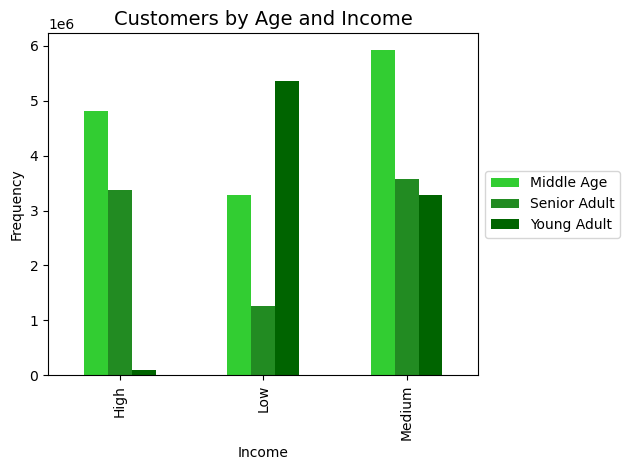

In [53]:
#bar chart of income_age crosstabs
income_age_bar = income_age.plot.bar(color = ['limegreen', 'forestgreen', 'darkgreen',])
plt.xlabel ('Income', fontsize = 10)
plt.ylabel ('Frequency', fontsize = 10)
plt.title ('Customers by Age and Income', fontsize = 14)
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.tight_layout()

In [115]:
#export age income chart
income_age_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_age_bar.png'))

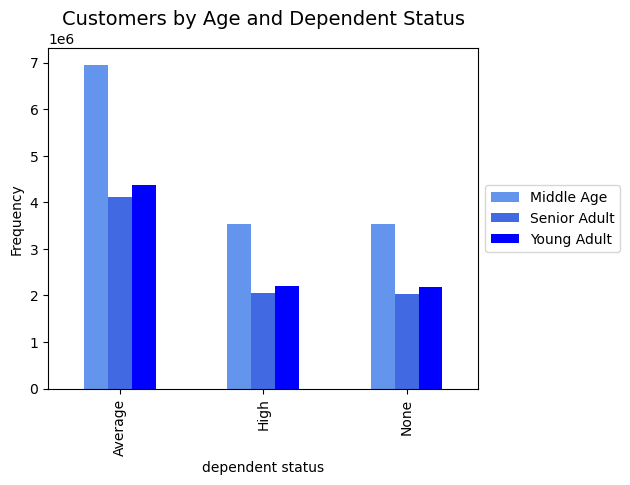

In [54]:
#bar chart of age and dependents
age_dependents_bar = age_dependents.plot.bar(color = ['cornflowerblue', 'royalblue', 'blue',])
plt.xlabel ('dependent status', fontsize = 10)
plt.ylabel ('Frequency', fontsize = 10)
plt.title ('Customers by Age and Dependent Status', fontsize = 14)
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.tight_layout()

In [116]:
#export age_dependents_bar
age_dependents_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dependents_bar.png'))

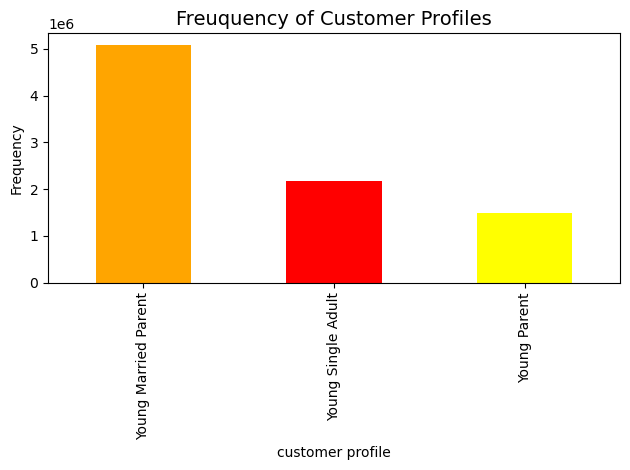

In [55]:
#distrobution of profiles
profile_bar = df_3['customer_profile'].value_counts().plot.bar(color = ['orange', 'red', 'yellow'])
plt.xlabel ('customer profile', fontsize = 10)
plt.ylabel ('Frequency', fontsize = 10)
plt.title ('Freuquency of Customer Profiles', fontsize = 14)
plt.tight_layout()

In [117]:
#export profile bar
profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_bar.png'))

In [56]:
income_profile = pd.crosstab(df_3['income_level'], df_3['customer_profile'])

In [57]:
income_profile

customer_profile,Young Married Parent,Young Parent,Young Single Adult
income_level,,,
High,60406,18187,24516
Low,3116189,895088,1349702
Medium,1903231,567877,803414


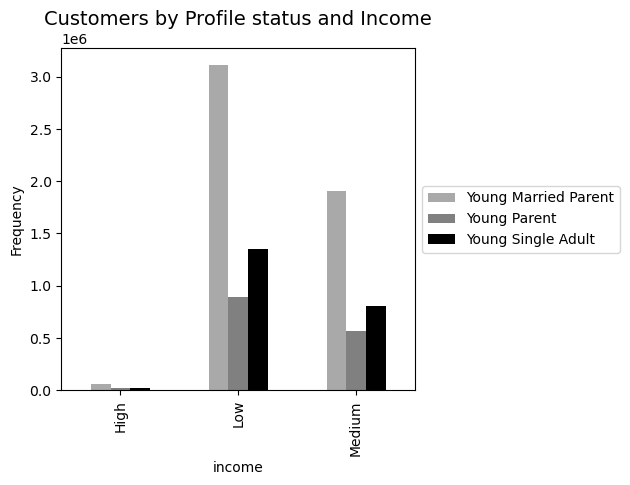

In [58]:
#bar chart of income and profile
income_profile_bar = income_profile.plot.bar(color = ['darkgrey', 'grey', 'black',])
plt.xlabel ('income', fontsize = 10)
plt.ylabel ('Frequency', fontsize = 10)
plt.title ('Customers by Profile status and Income', fontsize = 14)
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.tight_layout()

In [118]:
#export income_profile_bar
income_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_bar.png'))

In [59]:
#create a crosstab between profile and departments
profile_department = pd.crosstab(df_3['customer_profile'], df_3['department_id'])

In [60]:
profile_department

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
customer_profile,,,,,,,,,,,,,,,,,,,,,
Young Married Parent,347660,5590,183397,1486497,23763,41917,417048,14307,134956,5662,...,110881,291647,111253,167287,856789,113382,64796,459523,164503,10622
Young Parent,102993,1815,53684,430539,8379,12394,119107,5338,39542,1633,...,32344,85845,33198,48477,250187,33349,19381,131310,48119,3317
Young Single Adult,146384,2541,79950,638358,10243,18602,181235,6783,58083,2329,...,46167,125355,46966,71415,364355,49222,29288,194155,71241,4807


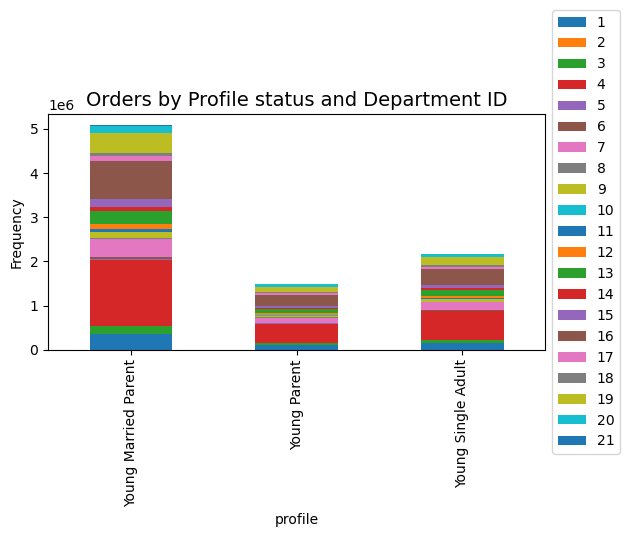

In [61]:
#create a bar chart for profile and departments
profile_department_bar = profile_department.plot.bar(stacked = True)
plt.xlabel ('profile', fontsize = 10)
plt.ylabel ('Frequency', fontsize = 10)
plt.title ('Orders by Profile status and Department ID', fontsize = 14)
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))
plt.tight_layout()

### 7. Aggregate variables based on Profiles

In [62]:
#aggregate max, mean and min of frequency and expenditure based on customer profiles
df_3.groupby('customer_profile').agg({'order_number': ['mean', 'min', 'max'],  'prices': ['mean', 'min', 'max']})

order_number            prices           
                             mean min max      mean  min   max
customer_profile                                              
Young Married Parent    17.767986   1  99  7.781014  1.0  25.0
Young Parent            18.000830   1  99  7.800475  1.0  25.0
Young Single Adult      17.734956   1  99  7.780231  1.0  25.0

### 8. Compare Profiles, Regions and Departments

In [63]:
profile_department

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
customer_profile,,,,,,,,,,,,,,,,,,,,,
Young Married Parent,347660,5590,183397,1486497,23763,41917,417048,14307,134956,5662,...,110881,291647,111253,167287,856789,113382,64796,459523,164503,10622
Young Parent,102993,1815,53684,430539,8379,12394,119107,5338,39542,1633,...,32344,85845,33198,48477,250187,33349,19381,131310,48119,3317
Young Single Adult,146384,2541,79950,638358,10243,18602,181235,6783,58083,2329,...,46167,125355,46966,71415,364355,49222,29288,194155,71241,4807


In [64]:
#create a crosstab of customer profile and region
profile_region = pd.crosstab(df_3['customer_profile'], df_3['region'])

In [65]:
profile_region

region,Midwest,Northeast,South,West
customer_profile,,,,
Young Married Parent,1175376,897623,1701023,1305804
Young Parent,351435,256429,505446,367842
Young Single Adult,491522,397401,743877,544832


In [66]:
#create a crosstab region and department_id
region_department = pd.crosstab(df_3['region'], df_3['department_id'])

In [67]:
region_department

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
region,,,,,,,,,,,,,,,,,,,,,
Midwest,498225,7983,261753,2134115,34043,60666,598979,21358,193463,7929,...,158260,420334,156155,237459,1212284,166992,95741,645143,234464,15563
Northeast,370436,6268,199300,1593004,25017,44678,462929,17734,143817,5599,...,118571,312731,117904,176936,914515,124604,72712,493154,178398,11512
South,709906,11579,371620,3027476,48813,84649,859419,29909,272813,11180,...,224120,591754,223172,337458,1722789,230061,139511,916780,333620,21787
West,543164,8581,288155,2324678,36754,65998,650574,24059,212043,8743,...,173830,457886,173619,260221,1326940,178200,102428,711329,257352,15906


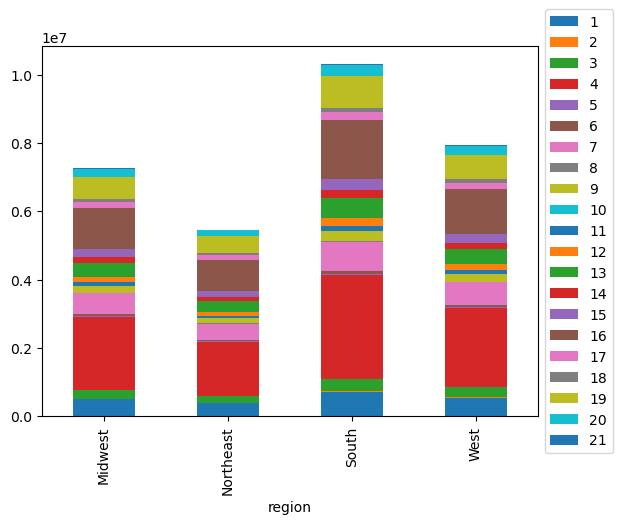

In [68]:
#create a bar chart representing frequency of dept id's by region
region_dept_bar = region_department.plot.bar(stacked=True)
plt.legend(loc = 'center left', bbox_to_anchor = (1.0, 0.5))

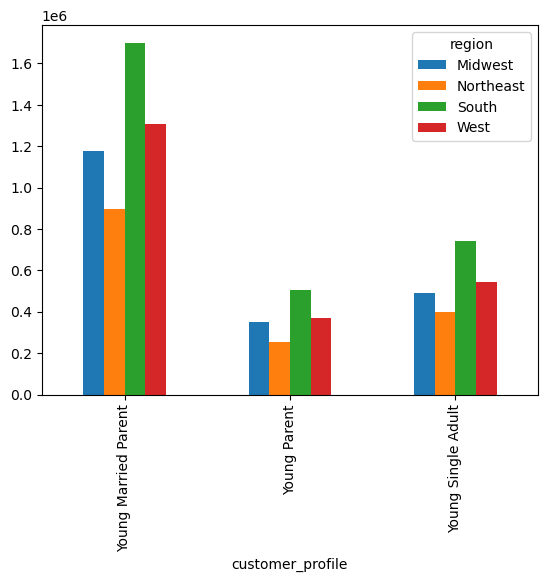

In [69]:
#create a bar chart representing counts of customer profiles per region
profile_region_bar = profile_region.plot.bar()

In [119]:
#export profile region bar
profile_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_region_bar.png'))

In [70]:
#create a new data frame that groups department id counts by region
df_4 = df_3['department_id'].groupby(df_3['region']).value_counts()

In [72]:
df_4.head()

region   department_id
Midwest  4                2134115
         16               1212284
         19                645143
         7                 598979
         1                 498225
Name: count, dtype: int64

In [104]:
#create a new dataframe the containes the top 5 department_ids for each region
df_5 = df_4.groupby(by = 'region').nlargest(5)

In [105]:
print(df_5)

region     region     department_id
Midwest    Midwest    4                2134115
                      16               1212284
                      19                645143
                      7                 598979
                      1                 498225
Northeast  Northeast  4                1593004
                      16                914515
                      19                493154
                      7                 462929
                      1                 370436
South      South      4                3027476
                      16               1722789
                      19                916780
                      7                 859419
                      1                 709906
West       West       4                2324678
                      16               1326940
                      19                711329
                      7                 650574
                      1                 543164
Name: count, dtype: int6

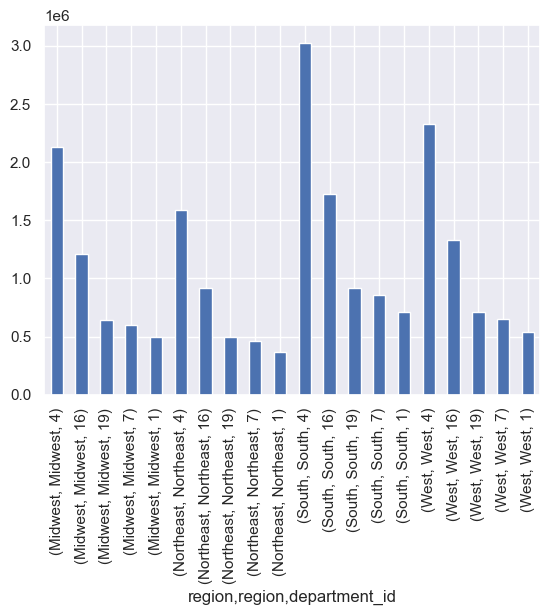

In [106]:
#create a bar chart that shows the top 5 departmetn id's for each region and their frequencies
top5_region_dept_bar = df_5.plot.bar()

In [120]:
#export top5_region_dept_bar
top5_region_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top5_region_dept_bar.png'))

In [107]:
df_6 = df_3['department_id'].groupby(df_3['customer_profile']).value_counts()

In [108]:
df_6.head()

customer_profile      department_id
Young Married Parent  4                1486497
                      16                856789
                      19                459523
                      7                 417048
                      1                 347660
Name: count, dtype: int64

In [111]:
df_7 = df_6.groupby(by = 'customer_profile').nlargest(5)

In [112]:
df_7

customer_profile      customer_profile      department_id
Young Married Parent  Young Married Parent  4                1486497
                                            16                856789
                                            19                459523
                                            7                 417048
                                            1                 347660
Young Parent          Young Parent          4                 430539
                                            16                250187
                                            19                131310
                                            7                 119107
                                            1                 102993
Young Single Adult    Young Single Adult    4                 638358
                                            16                364355
                                            19                194155
                                            7

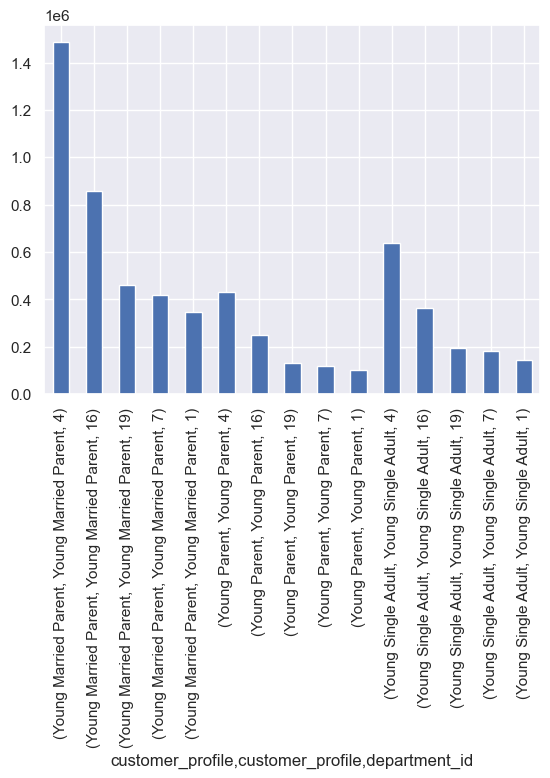

In [113]:
top5_dept_profile_bar = df_7.plot.bar()

In [122]:
#export top5_dept_profile_bar
top5_dept_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top5_dept_profile_bar.png'))

In [114]:
data_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [130]:
#export data frame (df_3) which contains only active customers to pkl
df_3.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_active_merged.pkl'))